# Color Threshold, Blue Screen

### Import resources

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib qt


### Read in and display the image

This image is: <class 'numpy.ndarray'>  with dimensions: (482, 654, 3)


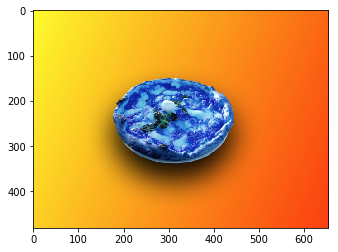

In [3]:
# Read in the image
image = cv2.imread('../data/pizza_bluescreen2.jpg')


# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)
plt.imshow(image)  # without doing RGB , original form in opencv is BGR


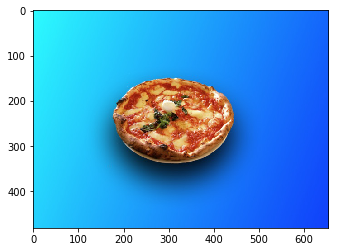

In [4]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)
plt.show()

[[253 253 253 253 253 253 253 253 253 255 255 254 254 253 253 253 254 254
  253 253]
 [253 253 253 253 253 253 253 253 253 255 255 254 254 253 253 253 254 254
  253 253]
 [253 253 253 253 253 253 253 253 255 255 254 254 254 253 253 253 254 254
  253 253]
 [253 253 253 253 253 253 253 253 255 254 254 254 254 253 253 253 254 253
  253 253]
 [253 253 253 253 253 253 253 253 254 254 254 254 254 253 253 253 253 253
  253 253]
 [253 253 253 253 253 253 253 255 254 254 254 254 253 253 253 253 253 253
  253 254]
 [253 253 253 253 253 253 253 255 254 254 254 254 253 253 253 253 253 253
  254 254]
 [253 253 253 253 253 253 255 255 254 254 254 253 253 253 253 253 254 254
  254 254]
 [253 253 253 253 252 252 254 254 254 254 254 254 253 253 253 253 254 254
  254 254]
 [253 253 253 253 252 254 254 254 254 254 254 254 253 253 254 254 254 254
  254 254]]
Area in pizza [[ 35  40  38 ... 165 156 144]
 [ 28  36  35 ... 146 140 129]
 [ 32  35  34 ... 134 134 134]
 ...
 [ 48  53  63 ... 114  95 102]
 [ 44 

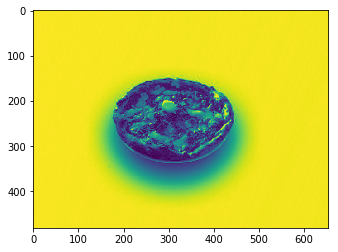

In [17]:
# look at image in Blue direction :
img_blue = image_copy[:,:,2]
plt.imshow(img_blue)
print (img_blue[0:10,0:20])
print ("Area in pizza",img_blue[220:280,200:220])

### Define the color threshold

A mask can be applied on an image of the same dimensions, but of any type. 
By applying a mask M on an image I, the pixels of I whose corresponding pixel 
in M are true are copied into a new image. The rest of the pixels in the new image are set to 0.



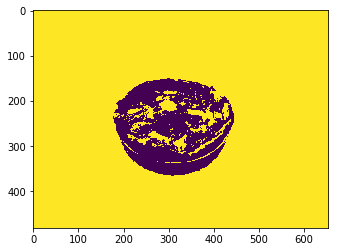

In [40]:
# ## TODO: Define the color selection boundaries in Blue values on blue image
# # play around with these values until you isolate the blue background
lower_blue = np.array([100])
upper_blue = np.array([255])
mask_bl = cv2.inRange(img_blue, lower_blue, upper_blue)
plt.imshow(mask_bl)

In [41]:
print(mask_bl[220:250,300:306])

[[255 255 255 255 255 255]
 [255 255 255 255 255 255]
 [255 255 255 255 255 255]
 [255 255 255 255 255 255]
 [  0 255   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0 255   0   0   0]]


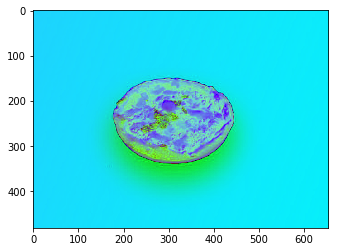

In [8]:
#In HSV, it is more easier to represent a color than RGB color-space.
#In our application, we will try to extract a blue colored object. So here is the method:

hsv = cv2.cvtColor(image_copy, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

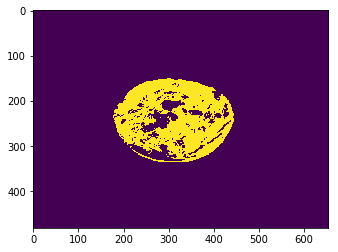

In [13]:
# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
plt.imshow(mask)

### Create a mask

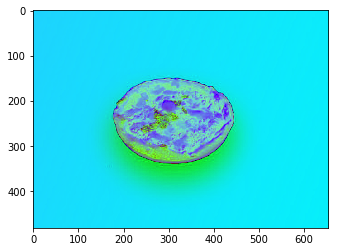

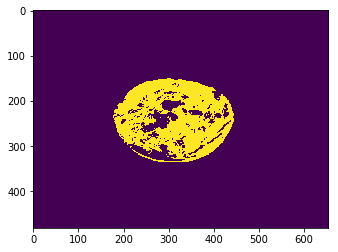

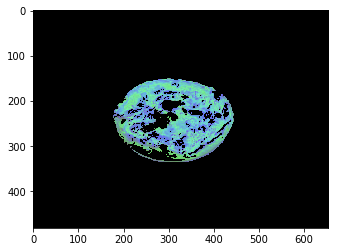

In [18]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(hsv,hsv, mask= mask)

plt.imshow(hsv)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(res)

### Mask and add a background image

numpy.ndarray

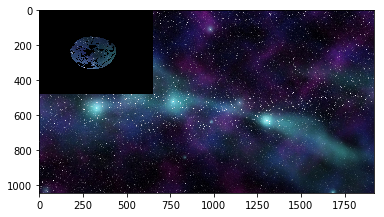

In [34]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('../data/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
background_image.shape
mask.shape
# Crop it to the right size (480, 654,)
crop_background = background_image[0:482, 0:654]

# # Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# # Display the background
plt.imshow(background_image)
mask.shape
type(mask)

### Create a complete image

In [18]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)

NameError: name 'masked_image' is not defined

In [58]:
tiny_image = np.array([[20,20,20,20],
                     [255,18,19,255],
                     [10,255,255,18],
                     [10,10,12,11]])

In [68]:
import matplotlib.image as mpimg

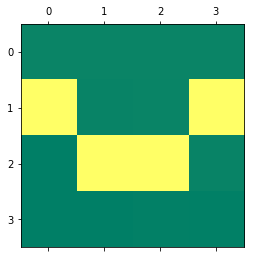

In [70]:
plt.matshow(tiny_image, cmap='summer')

In [64]:
tiny_image.size

16